
# The pole balancing problem
Course: Simulation Intelligence and Autonomous Systems<br>
Institution: Università degli studio di Trieste<br>
Author: Arahí Fernández Monagas<br>
Date: October 2025


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [5]:
sp.init_printing(use_unicode=True)

# Variables and states
x1 = sp.symbols('theta')      # pole angle with the vertical
x2 = sp.symbols('theta_dot')  # pole angular velocity
x3 = sp.symbols('pc')          # cart position
x4 = sp.symbols('pc_dot')      # cart velocity


x = sp.Matrix([x1, x2, x3, x4])  # state vector
u = sp.symbols('F')               # control input (force applied to the cart) 

g = sp.symbols('g')    # gravity acceleration
m_c = sp.symbols('m_c')  # cart mass
m_p = sp.symbols('m_p')  # pole mass
l = sp.symbols('l')    # half pole length
mu_p = sp.symbols('mu_p')  # pole friction coefficient

print("State vector (x):\n")
sp.pprint(x)
print("\nInput (u):", u)

State vector (x):

⎡  θ   ⎤
⎢      ⎥
⎢θ_dot ⎥
⎢      ⎥
⎢  pc  ⎥
⎢      ⎥
⎣pc_dot⎦

Input (u): F


In [28]:
#Definition of the system
x1_dot = x2
numer_f2 = g * sp.sin(x1) + sp.cos(x1) * ((-u - m_p * l * x2**2 * sp.sin(x1)) / (m_c + m_p)) - (mu_p * x2) / (m_p * l)
denom_f2 = l * (sp.Rational(4, 3) - (m_p * sp.cos(x1)**2) / (m_c + m_p))
x2_dot = numer_f2 / denom_f2
x3_dot = x4
x4_dot = (u + m_p * l * (x2**2 * sp.sin(x1) - x2 * sp.cos(x1))) / (m_c + m_p)

x_dot = sp.Matrix([x1_dot, x2_dot, x3_dot, x4_dot])
print("\nState derivatives (x_dot):")
sp.pprint(x_dot)



State derivatives (x_dot):
⎡                        θ_dot                         ⎤
⎢                                                      ⎥
⎢           ⎛               2       ⎞                  ⎥
⎢           ⎝-F - l⋅mₚ⋅θ_dot ⋅sin(θ)⎠⋅cos(θ)   μₚ⋅θ_dot⎥
⎢g⋅sin(θ) + ──────────────────────────────── - ────────⎥
⎢                       m_c + mₚ                 l⋅mₚ  ⎥
⎢──────────────────────────────────────────────────────⎥
⎢                   ⎛        2       ⎞                 ⎥
⎢                   ⎜  mₚ⋅cos (θ)   4⎟                 ⎥
⎢                 l⋅⎜- ────────── + ─⎟                 ⎥
⎢                   ⎝   m_c + mₚ    3⎠                 ⎥
⎢                                                      ⎥
⎢                        pc_dot                        ⎥
⎢                                                      ⎥
⎢                ⎛     2                      ⎞        ⎥
⎢       F + l⋅mₚ⋅⎝θ_dot ⋅sin(θ) - θ_dot⋅cos(θ)⎠        ⎥
⎢       ───────────────────────────────────────        ⎥
⎣  

In [29]:
#Now I'll calculate the equilibrium point
x_eq = x_dot.subs([
    (u, 0),
    (x2, 0),
    (x4, 0)
])
sp.pprint(x_eq)

# Solve for equilibrium points
equilibrium_points = sp.solve([eq for eq in x_eq], (x1, x2, x3, x4))
print("\nEquilibrium points:")
sp.pprint(equilibrium_points)   

eq_1 = sp.Matrix([0,0,0,0])
eq_2 = sp.Matrix([sp.pi,0,0,0])
u_bar = 0

⎡         0          ⎤
⎢                    ⎥
⎢      g⋅sin(θ)      ⎥
⎢────────────────────⎥
⎢  ⎛        2       ⎞⎥
⎢  ⎜  mₚ⋅cos (θ)   4⎟⎥
⎢l⋅⎜- ────────── + ─⎟⎥
⎢  ⎝   m_c + mₚ    3⎠⎥
⎢                    ⎥
⎢         0          ⎥
⎢                    ⎥
⎣         0          ⎦

Equilibrium points:
[(0, θ_dot, pc, pc_dot), (π, θ_dot, pc, pc_dot)]


In [33]:
#Linearization around the equilibrium point
A = x_dot.jacobian(x)
B = x_dot.jacobian(sp.Matrix([u]))

g_val = 9.81  # m/s^2
m_c_val = 1.0  # kg
m_p_val = 0.1  # kg
l_val = 0.5    # m
mu_p_val = 0.05  # N/m/s

#Checking stability for the first equilibrium point (downward position)

A_eq1 = A.subs([
    (x1, eq_1[0]),  
    (x2, eq_1[1]),
    (x3, eq_1[2]),
    (x4, eq_1[3]),  
    (u, u_bar)
])

A_eq1 = A_eq1.subs([
    (g, g_val),
    (m_c, m_c_val),
    (m_p, m_p_val),
    (l, l_val),
    (mu_p, mu_p_val)
])

eigenvals_eq1 = A_eq1.eigenvals()
print("\nEigenvalues at Equilibrium Point 1 (Downward Position):")
for val, mult in eigenvals_eq1.items():
    sp.pprint(val)
    if sp.re(val) > 0:
        print("Unstable eigenvalue detected.") 
        print("Unstable equilibrium at downward position.\n")
        break
    else:
        continue
    
#Checking stability for the second equilibrium point (upward position)
A_eq2 = A.subs([
    (x1, eq_2[0]),  
    (x2, eq_2[1]),
    (x3, eq_2[2]),
    (x4, eq_2[3]),
    (u, u_bar)
])

A_eq2 = A_eq2.subs([
    (g, g_val), 
    (m_c, m_c_val),
    (m_p, m_p_val),
    (l, l_val),
    (mu_p, mu_p_val)
])
eigenvals_eq2 = A_eq2.eigenvals()
print("\nEigenvalues at Equilibrium Point 2 (Upward Position):")
for val, mult in eigenvals_eq2.items():
    sp.pprint(val)
    # Check for positive eigenvalues having imaginary parts
    if sp.re(val) > 0:
        print("Unstable eigenvalue detected.") 
        print("Unstable equilibrium at upward position.\n")
        break
    else:
        continue

print("Stable equilibrium at upward position.\n")


Eigenvalues at Equilibrium Point 1 (Downward Position):
0
-4.85944781516531
3.24969171760433
Unstable eigenvalue detected.
Unstable equilibrium at downward position.


Eigenvalues at Equilibrium Point 2 (Upward Position):
0
-0.804878048780488 - 3.89151366998299⋅ⅈ
-0.804878048780488 + 3.89151366998299⋅ⅈ
Stable equilibrium at upward position.



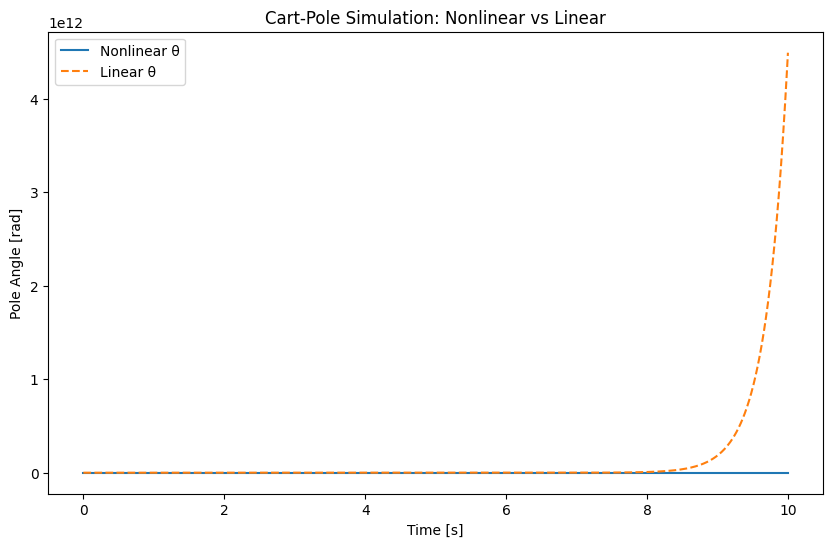

In [39]:
#Simulation parameters
dt = 0.01  # time step
T = 10.0   # total simulation time
num_steps = int(T / dt)
t_vec = np.linspace(0, T, num_steps)  


import scipy.linalg

# Substitute numerical values for parameters
params = {
    g: 9.81,
    m_c: 1.0,
    m_p: 0.1,
    l: 0.5,
    mu_p: 0.05
}

# Convert symbolic expressions to numerical functions
f_sym = x_dot
f_num = sp.lambdify((x1, x2, x3, x4, u), f_sym.subs(params), 'numpy')

# Linearized system matrices at downward equilibrium
A_num = np.array(A.subs({**params, x1: 0, x2: 0, x3: 0, x4: 0, u: 0})).astype(float)
B_num = np.array(B.subs({**params, x1: 0, x2: 0, x3: 0, x4: 0, u: 0})).astype(float)

def simulate_nonlinear(x0, u_seq, dt):
    X = np.zeros((len(u_seq)+1, 4))
    X[0] = x0
    for k, uk in enumerate(u_seq):
        dx = np.array(f_num(*X[k], uk)).flatten()
        X[k+1] = X[k] + dx * dt
    return X

def simulate_linear(x0, u_seq, dt):
    X = np.zeros((len(u_seq)+1, 4))
    X[0] = x0
    for k, uk in enumerate(u_seq):
        dx = A_num @ X[k] + B_num.flatten() * uk
        X[k+1] = X[k] + dx * dt
    return X

N = num_steps
u_seq = np.zeros(N)  
x0 = np.array([0.1, 0, 0, 0]) 

X_nl = simulate_nonlinear(x0, u_seq, dt)
X_lin = simulate_linear(x0, u_seq, dt)

plt.figure(figsize=(10,6))
plt.plot(t_vec, X_nl[:-1,0], label='Nonlinear θ')
plt.plot(t_vec, X_lin[:-1,0], '--', label='Linear θ')
plt.xlabel('Time [s]')
plt.ylabel('Pole Angle [rad]')
plt.legend()
plt.title('Cart-Pole Simulation: Nonlinear vs Linear')
plt.show()

Here we can see that if we mixed both graphics are practicaly the same except from the 8 steps and this is just only for some perturbations in the input. With this we can conclude that the aproximation of the non linear systems is good and for futures implementation (LQR) will be usefull